<a href="https://colab.research.google.com/github/rishabh102004/nmep-stuff/blob/main/Copy_of_Signal_Processing_Workshop_Sp24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Signal Processing Workshop

In [33]:
# Import necessary libraries: numpy (math, matrix operations), scipy (a huge signal processing library), and
# pyplot (a plotting library)

import numpy as np
from scipy import signal
from scipy.signal import freqz
from matplotlib import pyplot as plt
from ipywidgets import widgets, interact

## FFT on the Sum of Sinusoids

This code section generates sinusoids at 6 frequencies - 5, 10, 15, 20, 25, and 30 Hz.

It then weights each sinusoid by a different amount and sums them up to create one signal.

Then, we plot the signal itself in the time domain (first plot) and the Fast Fourier Transform of the signal using the `np.fft.fft` function. Don't worry about some of the other functions here like `np.fft.fftshift`, that's just making the frequency-domain data more intuitive to look at.

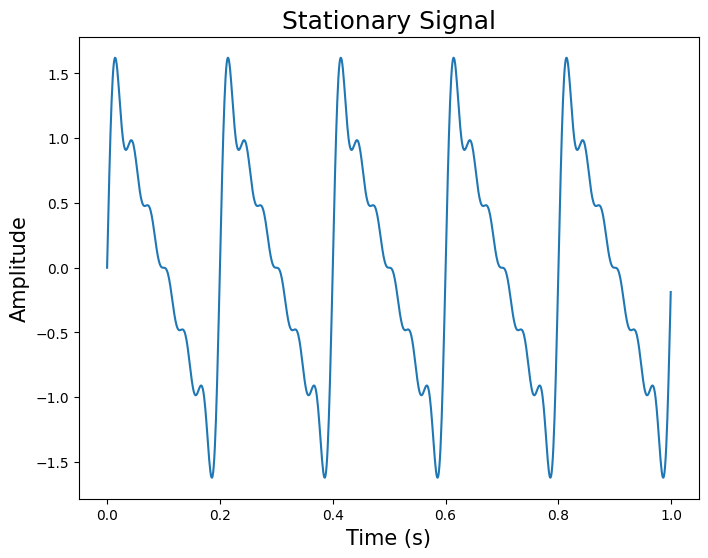

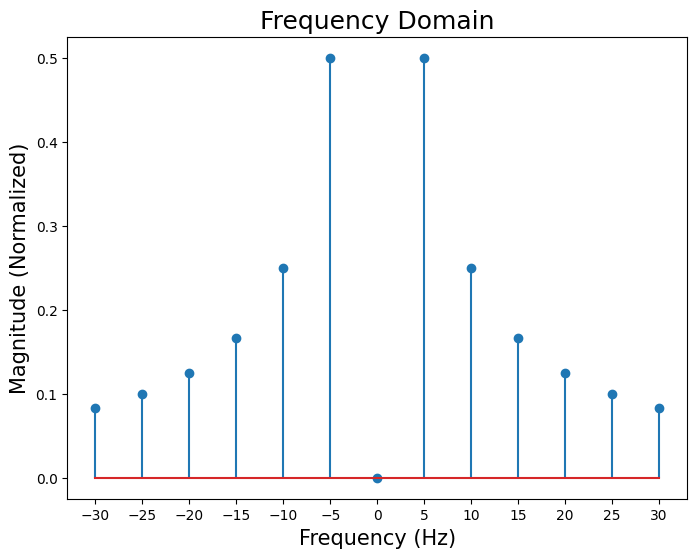

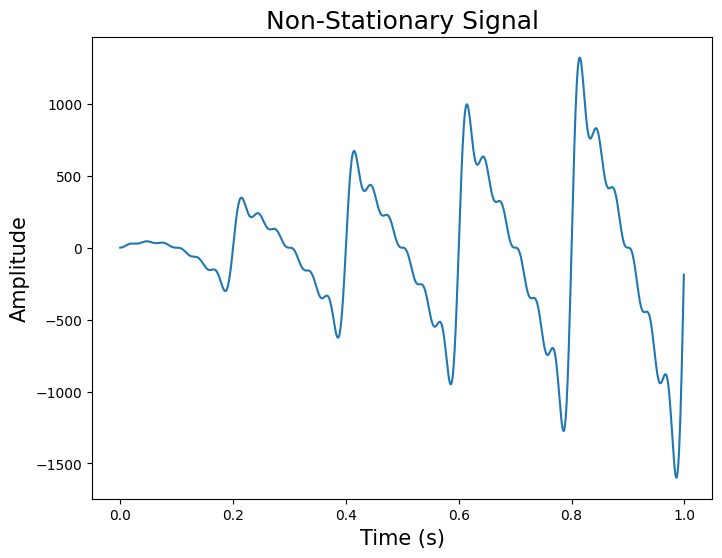

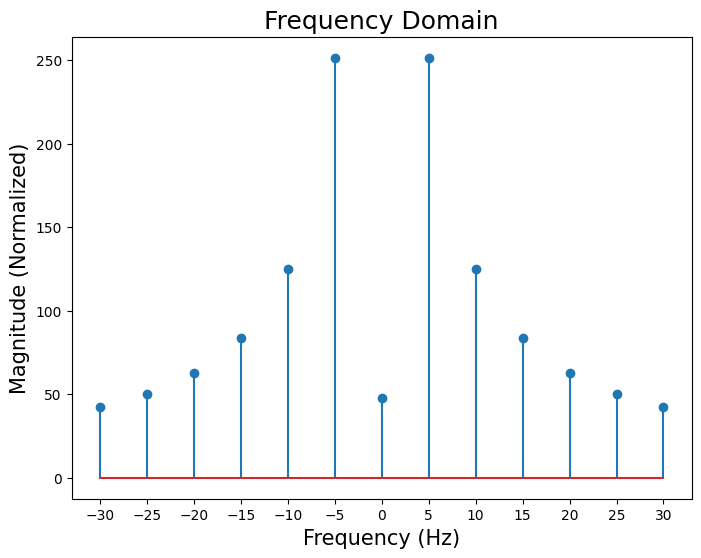

In [34]:
# Fourier Transform Visualization - sum of two sinusoids

fs = 1000 # sampling frequency of 1000 Hz
t = np.linspace(0, 1, fs, False) # create a time axis from 0 -> 1 second with 1000 points

frequencies = [5, 10, 15, 20, 25, 30] # frequencies of the sinusoids in our signal

y = 0
for i in range(len(frequencies)):
    coeff = 1 / (i+1) # coeff = 1 for 10 Hz, 1/2 for 15 Hz, 1/3 for 20 Hz, etc.
    freq = frequencies[i]
    sig = coeff * np.sin(2 * np.pi * freq * t)
    y += sig # add the weighted sinusoid to our overall signal 'y'


# Time Domain Plot
plt.figure(figsize=(8,6))
plt.plot(t,y)
plt.title('Stationary Signal', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.show()

# Frequency Domain Plot
freqs = np.linspace(- fs // 2, fs // 2, fs, False)
h = np.fft.fft(y)
h /= len(h)
h = np.fft.fftshift(h)
plt.figure(figsize=(8,6))
plt.stem(freqs[470:535:5], abs(h)[470:535:5])
plt.title('Frequency Domain', fontsize = 18)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude (Normalized)', fontsize = 15)
plt.xticks(np.linspace(-30, 30, 13))
plt.show()

z = [y_val*index for (index, y_val) in enumerate(y)]

# Time Domain Plot
plt.figure(figsize=(8,6))
plt.plot(t,z)
plt.title('Non-Stationary Signal', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.show()

# Frequency Domain Plot
freqs = np.linspace(- fs // 2, fs // 2, fs, False)
h = np.fft.fft(z)
h /= len(h)
h = np.fft.fftshift(h)
plt.figure(figsize=(8,6))
plt.stem(freqs[470:535:5], abs(h)[470:535:5])
plt.title('Frequency Domain', fontsize = 18)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude (Normalized)', fontsize = 15)
plt.xticks(np.linspace(-30, 30, 13))
plt.show()

## Task 1

1) Using the same code skeleton, generate sine waves at 3 different frequencies - 1, 12, and 24 Hz.

Then, weight each sinusoid by a different amount and sums them up to create one signal.

Then, we plot the signal itself in the time domain (first plot) and the Fast Fourier Transform of the signal using the `np.fft.fft` function. Don't worry about some of the other functions here like `np.fft.fftshift`, that's just making the data more intuitive to look at.

2) Explain why using just the Fourier Transform as we did in the above cell might not be a great idea for non-stationary signals.

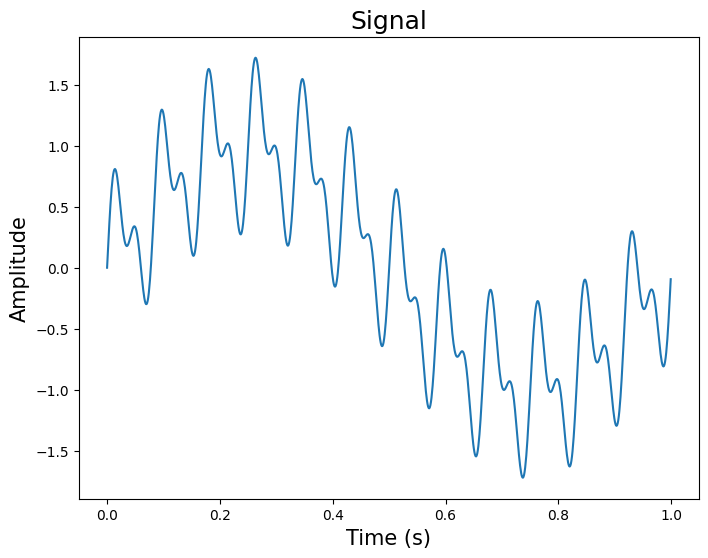

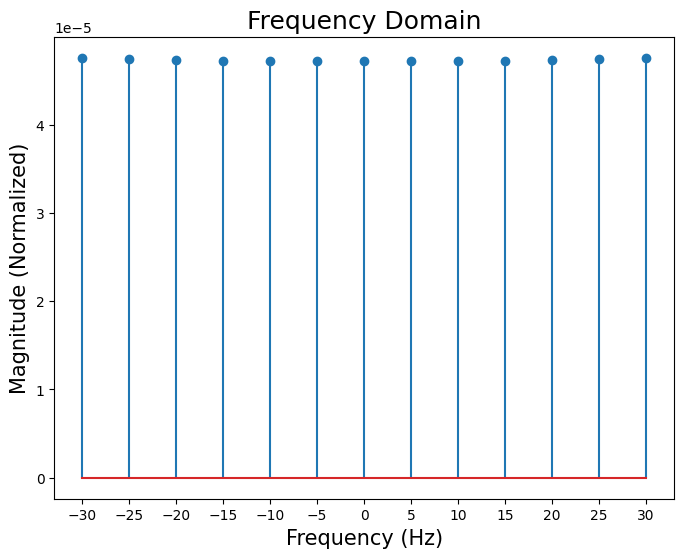

In [35]:
# Fourier Transform Visualization - sum of two sinusoids

fs = 1000 # sampling frequency of 1000 Hz
t = np.linspace(0, 1, fs, False) # create a time axis from 0 -> 1 second with 1000 points

# TO-DO
frequencies = [1, 12, 24] # frequencies of the sinusoids in our signal
#END OF TO-DO

y = 0
for i in range(len(frequencies)):
    coeff = 1 / (i+1) # coeff = 1 for 10 Hz, 1/2 for 15 Hz, 1/3 for 20 Hz, etc.
    freq = frequencies[i]
    sig = coeff * np.sin(2 * np.pi * freq * t)
    y += sig # add the weighted sinusoid to our overall signal 'y'


# Time Domain Plot
plt.figure(figsize=(8,6))
plt.title('Signal', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
#TODO
plt.plot(t, y)
#END OF TO-DO
plt.show()

z = [y_val*index for (index, y_val) in enumerate(y)]
# Frequency Domain Plot
freqs = np.linspace(- fs // 2, fs // 2, fs, False)
#TO-DO:

#END OF TO-DO
h /= len(h)
h = np.fft.fftshift(h)
plt.figure(figsize=(8,6))
plt.stem(freqs[470:535:5], abs(h)[470:535:5])
plt.title('Frequency Domain', fontsize = 18)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude (Normalized)', fontsize = 15)
plt.xticks(np.linspace(-30, 30, 13))
plt.show()

## Power Spectral Density Plot

Now we can plot the Power Spectral Density plot of our signal.

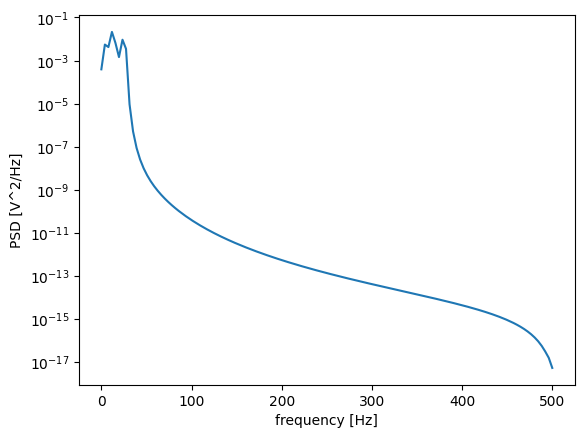

In [36]:
#Power Spectral Density Plot
f, Pxx_den = signal.welch(y, fs)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
# plt.xlim([0,50])
plt.show()

## Spectrograms

In [37]:
# Spectrogram Example

# Use a chirp signal as the example
fs = 7200
T = 4
t = np.arange(0, int(T*fs)) / fs

#Generate a linear chirp from 5 -> 1250 Hz
w = signal.chirp(t, f0=5, f1=1250, t1=T, method='linear')

# much of this code below came from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
def plot_spectrogram(title, w, fs):
     ff, tt, Sxx = signal.spectrogram(w, fs=fs, nperseg=256, nfft=576)
     plt.figure(figsize=(8,6))
     plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='turbo', shading='gouraud')
     plt.colorbar()
     plt.title(title, fontsize = 18)
     plt.xlabel('Time (s)', fontsize = 15)
     plt.ylabel('Frequency (Hz)', fontsize = 15)
     plt.grid()

Text(0.5, 1.0, 'Linear Chirp from 5 to 50 Hz')

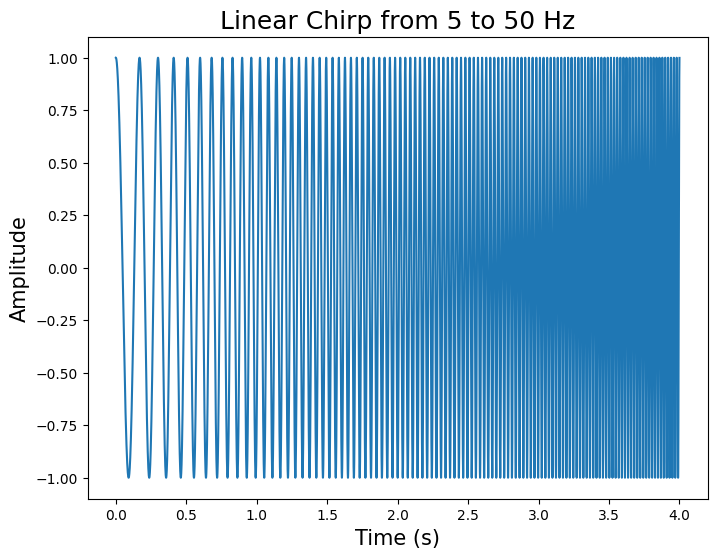

In [38]:
w = signal.chirp(t, f0=5, f1=50, t1=T, method='linear')
plt.figure(figsize=(8,6))
plt.plot(t,w)
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Linear Chirp from 5 to 50 Hz', fontsize=18)

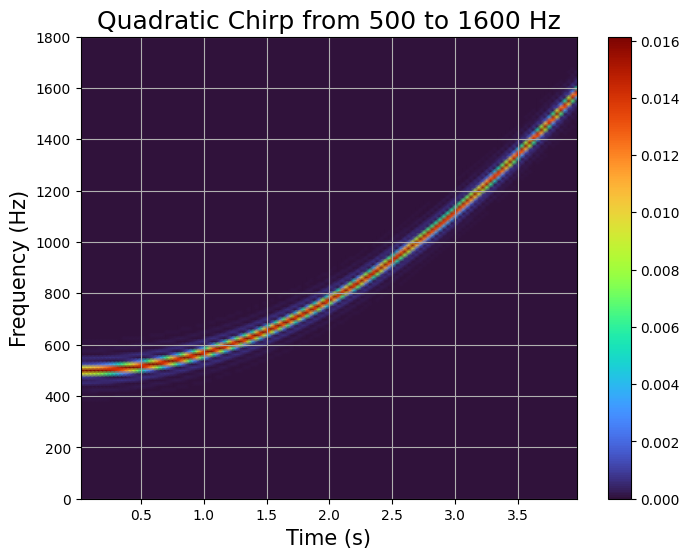

In [39]:
# Generate a quadratic chirp from 500 to 1600 Hz
w = signal.chirp(t, f0=500, f1=1600, t1=T, method='quadratic')
plot_spectrogram('Quadratic Chirp from 500 to 1600 Hz', w, fs)

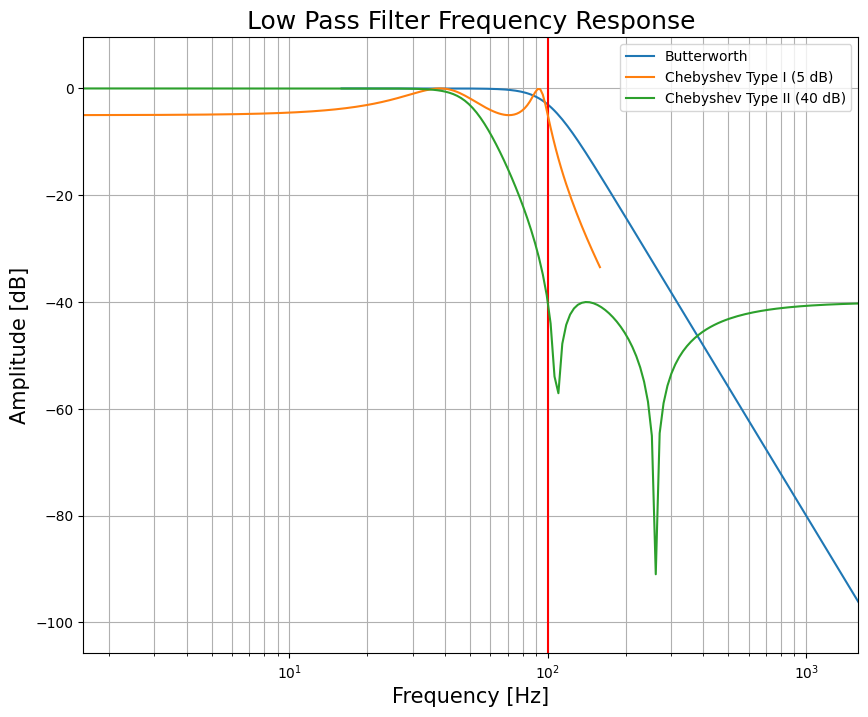

In [40]:
# Demo of Filters

# Butterworth Low Pass Filter
# Design a 4th order Butterworth LPF with a cutoff frequency of 100 Hz

order = 4
cutoff = 100 * 2 * np.pi # the units for an 'analog = True' filter are radians/sec

# b,a are the filter coefficients (for the numerator and denominator polynomials)
# to learn more about how filter coefficients work, read here: https://en.wikipedia.org/wiki/Digital_filter
b,a = signal.butter(order, cutoff, btype = 'low', analog = True, output = 'ba')
w, h = signal.freqs(b, a)

# Plot the frequency response
f = w / (2 * np.pi)
plt.figure(figsize=(10,8))
plt.semilogx(f, 20 * np.log10(abs(h)), label='Butterworth')
plt.title('Low Pass Filter Frequency Response', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('Amplitude [dB]', fontsize=15)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff / (2 * np.pi), color='red') # cutoff frequency

# Chebyshev Type I filter (ripple in the passband)
bc,ac = signal.cheby1(order, 5, cutoff, btype='low', analog = True, output = 'ba')
wc, hc = signal.freqs(bc, ac)
fc = wc / (2 * np.pi)
plt.semilogx(fc, 20 * np.log10(abs(hc)), label='Chebyshev Type I (5 dB)')

# Chebyshev Type II (ripple in the stopband)
bc2,ac2 = signal.cheby2(order, 40, cutoff, btype='low', analog = True, output = 'ba')
wc2, hc2 = signal.freqs(bc2, ac2)
fc2 = wc2 / (2 * np.pi)
plt.semilogx(fc2, 20 * np.log10(abs(hc2)), label='Chebyshev Type II (40 dB)')

plt.legend(loc='best', prop={'size': 10})
plt.show()

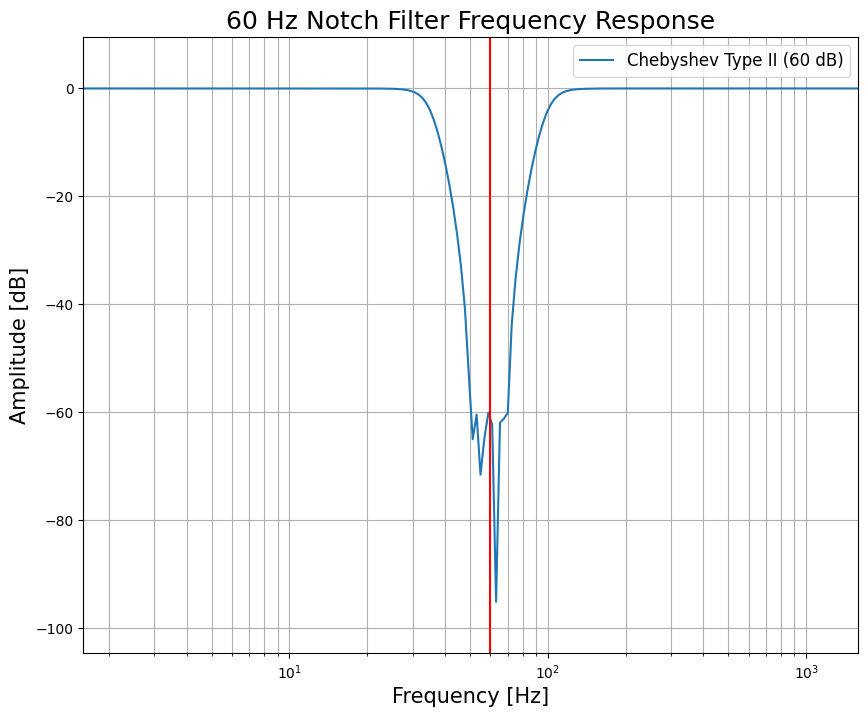

In [41]:
# An example of a bandstop filter for 60 Hz rejection
# Using Chebyshev type II filter

bc2,ac2 = signal.cheby2(4, 60, [50 * 2 * np.pi, 70 * 2 * np.pi], btype='bandstop', analog = True, output = 'ba')
wc2, hc2 = signal.freqs(bc2, ac2)
fc2 = wc2 / (2 * np.pi)
plt.figure(figsize=(10,8))
plt.semilogx(fc2, 20 * np.log10(abs(hc2)), label='Chebyshev Type II (60 dB)')
plt.title('60 Hz Notch Filter Frequency Response', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('Amplitude [dB]', fontsize=15)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(60, color='red') # notch frequency
plt.legend(loc='best', prop={'size':12})

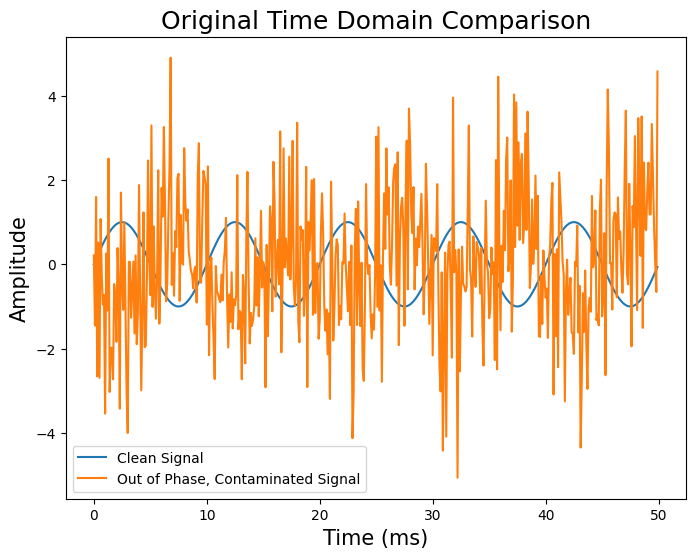

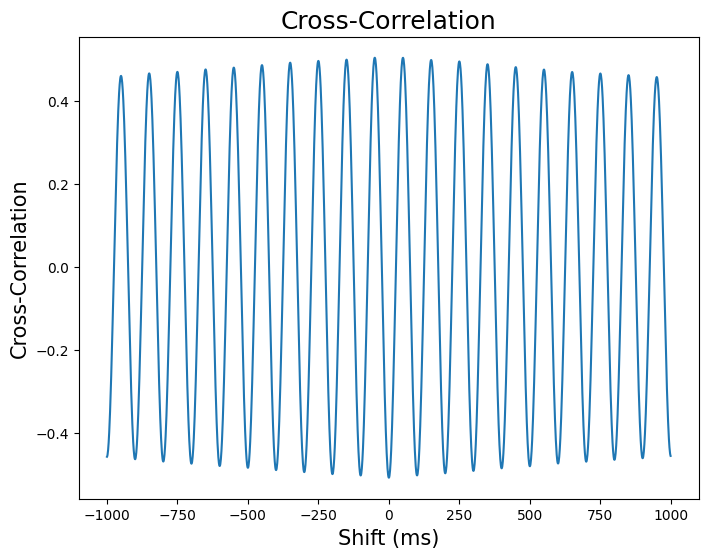

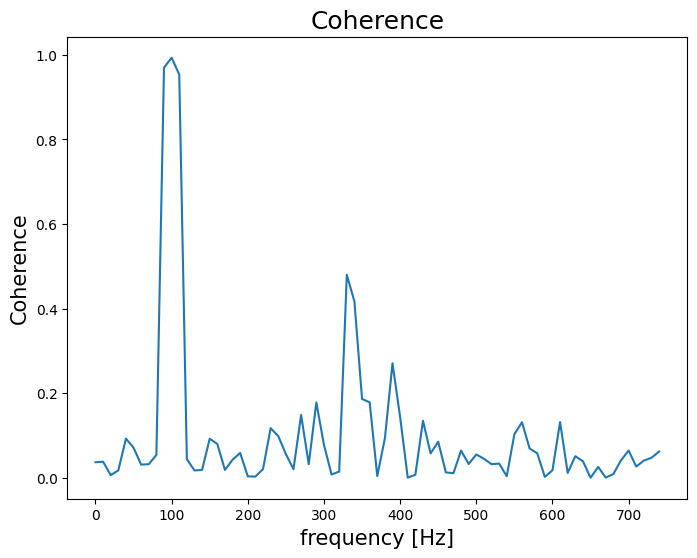

In [42]:
# Correlation vs. Coherence

fs = 10000
T = 1
t = t = np.arange(0, int(T*fs)) / fs

x = np.sin(2 * np.pi * 100 * t) # clean sinusoid

sigma = 1.5
noise = np.random.normal(scale=sigma, size=len(t))
y = x + noise # add Gaussian noise to the clean sinusoid
y = np.roll(y, 50) #shift the y signal perfectly out of phase with x

plt.figure(figsize=(8,6))
plt.plot(t[:500] * 1e3,x[:500], label='Clean Signal')
plt.plot(t[:500] * 1e3,y[:500], label ='Out of Phase, Contaminated Signal')
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Original Time Domain Comparison', fontsize=18)
plt.legend(loc='best', prop={'size':10})
plt.show()

plt.figure(figsize=(8,6))
corr = signal.correlate(x, y, mode='same') / len(x)
shifts = np.linspace(- fs // 2, fs // 2 - 1, fs)
plt.plot(shifts[4000:6000], corr[4000:6000])
plt.xlabel('Shift (ms)', fontsize=15)
plt.ylabel('Cross-Correlation', fontsize=15)
plt.title('Cross-Correlation', fontsize=18)
plt.show()

plt.figure(figsize=(8,6))
f, Cxy = signal.coherence(x, y, fs, nperseg=1000)
plt.plot(f[:75], Cxy[:75])
plt.xlabel('frequency [Hz]', fontsize=15)
plt.ylabel('Coherence', fontsize=15)
plt.title('Coherence', fontsize=18)
plt.show()

##Task 2

1) Why do we use coherence instead of cross-correlation? Use the above graphs as evidence.

2) Design a 5th order low-pass filter with a cutoff frequency of 1kHz. Decide on which type of filter to used based on the folowing scenario: We are sampling at 1kHz, with a passband of 10-495Hz. You may assume our analog front-end team is spectacular. We want to maximize SNDR (signal to noise and distortion ratio), so we want to minimize distortion and leave the signal as unchanged as possible within our pass-band. (Extra: Why might oversampling more change this? Reminder: this reduces the risk of aliasing, but leads to more 'allowed' frequencies above 495Hz)?

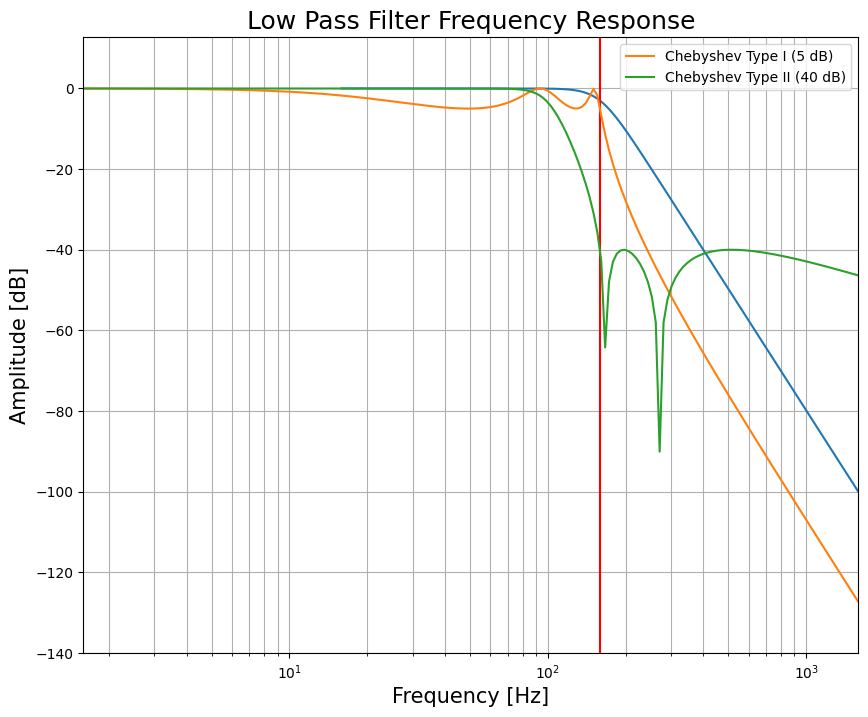

In [43]:
# Butterworth Low Pass Filter
# Design a 5th order  HPF with a cutoff frequency of 1000 Hz

#TO-DO
order = 5
cutoff = 1000
#END OF TO-DO
b,a = signal.butter(order, cutoff, btype = 'low', analog = True, output = 'ba')
w, h = signal.freqs(b, a)

# Plot the frequency response
f = w / (2 * np.pi)
plt.figure(figsize=(10,8))
plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('Low Pass Filter Frequency Response', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('Amplitude [dB]', fontsize=15)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff / (2 * np.pi), color='red') # cutoff frequency

# Chebyshev Type I filter (ripple in the passband)
bc,ac = signal.cheby1(order, 5, cutoff, btype='low', analog = True, output = 'ba')
wc, hc = signal.freqs(bc, ac)
fc = wc / (2 * np.pi)
plt.semilogx(fc, 20 * np.log10(abs(hc)), label='Chebyshev Type I (5 dB)')

# Chebyshev Type II (ripple in the stopband)
bc2,ac2 = signal.cheby2(order, 40, cutoff, btype='low', analog = True, output = 'ba')
wc2, hc2 = signal.freqs(bc2, ac2)
fc2 = wc2 / (2 * np.pi)
plt.semilogx(fc2, 20 * np.log10(abs(hc2)), label='Chebyshev Type II (40 dB)')

plt.legend(loc='best', prop={'size': 10})
plt.show()

## The DFT and Zero-Padding

These next couple cells demonstrate the main method for calculating the Fourier Transform, the DFT matrix (calculated fast using the FFT algorithm).

A good way to think about the DFT is that the matrix samples the Fourier Transform (DTFT), which is a continuous function and therefore is unrealistic to use on discrete signals in a computationally efficient manner.

This shows how a longer signal, even if it contains no real new information, can give us better spectral resolution when using the DFT, because it samples the Fourier Transform faster --> this lends itself to thinking of the DFT as a change of basis, where a bigger vector in the time domain allows us to represent the signal with a bigger vector (more frequency samples) in the frequency domain.

However, notice that the DTFT doesn't change between the two plots. To improve the quality of the DTFT that we are sampling, we need more time-domain points (a higher sampling rate).

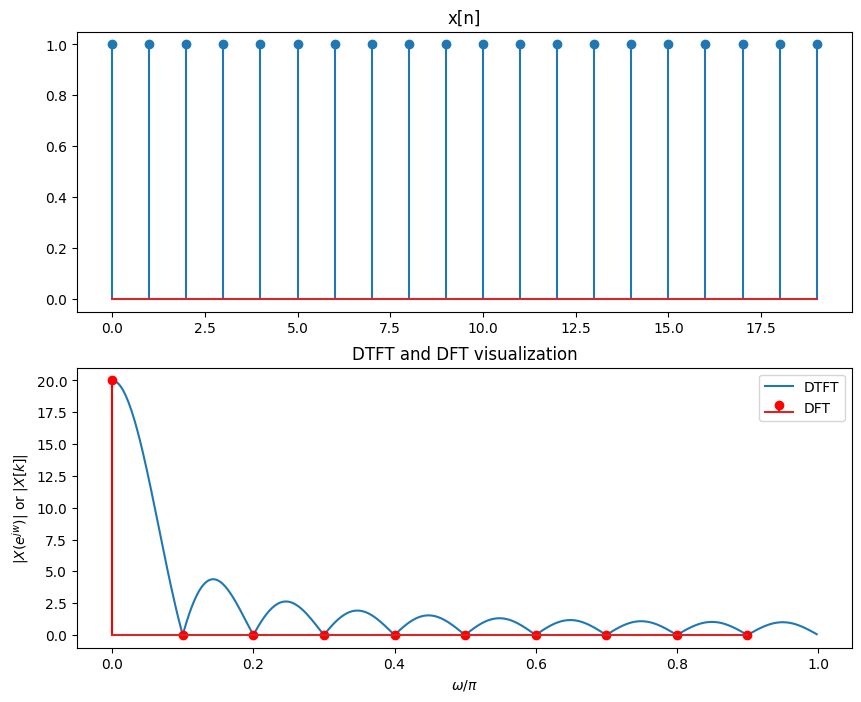

In [44]:
# define x[n], here we just use a rectangular window for illustration
N = 20
x = np.ones(N)

# calculate the DTFT using freqz
w, h = freqz(x)

# calculate the DFT using fft
dft = np.fft.fft(x)

# extract the corresponding frequency for the first half of DFT
w1 = np.arange(0, N//2)*2*np.pi/N

# visualization
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.stem(x), plt.title('x[n]')
plt.subplot(2,1,2)
plt.plot(w/np.pi, np.abs(h), label='DTFT'), plt.stem(w1/np.pi, np.abs(dft)[:N//2], 'r', label='DFT')
plt.xlabel(r'$\omega/\pi$'), plt.ylabel(r'$|X(e^{jw})|$ or $|X[k]|$'), plt.title('DTFT and DFT visualization')
plt.legend()

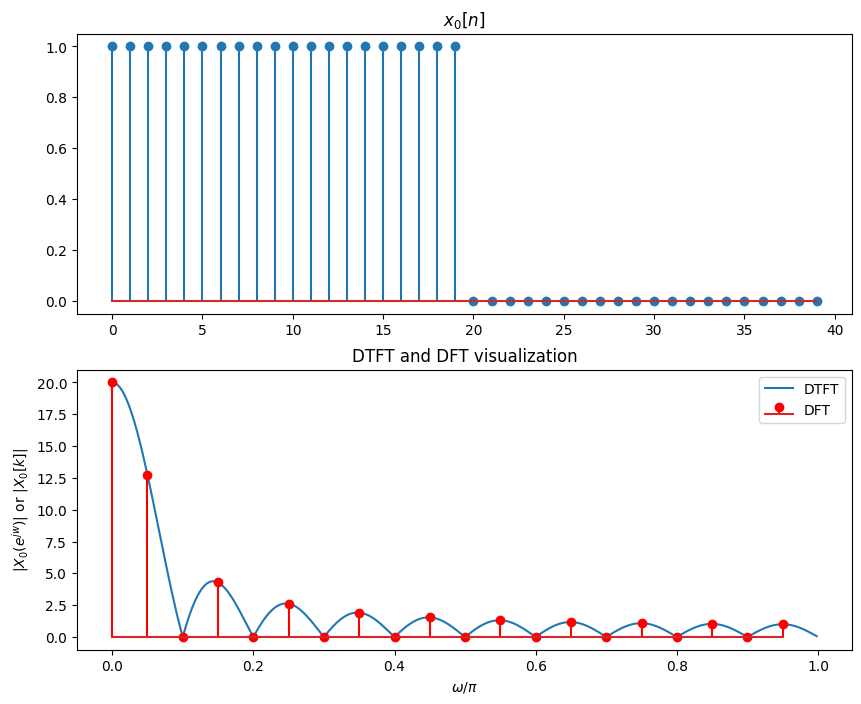

In [45]:
M = N + N
# zero padding
x0 = np.hstack([x, np.zeros(M-N)])

# calculate the DTFT using freqz
w, h = freqz(x0)

# calculate the DFT using fft
dft = np.fft.fft(x0)

# extract the corresponding frequency for the first half of DFT
w1 = np.arange(0, M//2)*2*np.pi/M

# visualization
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.stem(x0), plt.title(r'$x_0[n]$')
plt.subplot(2,1,2)
plt.plot(w/np.pi, np.abs(h), label='DTFT'), plt.stem(w1/np.pi, np.abs(dft)[:M//2], 'r', label='DFT')
plt.xlabel(r'$\omega/\pi$'), plt.ylabel(r'$|X_0(e^{jw})|$ or $|X_0[k]|$'), plt.title('DTFT and DFT visualization')
plt.legend()

## STFT(Spectrograms)
This section of the code plots the short-time Fourier transform of your original sequence. You can decrease the size of each time window by increasing ```time_seg```, meaning you segment the original time sequence into more pieces. By doing so, you could clearly see the trade-off. In addition, you can also see the effect of window function type on STFT by selecting different window functions with the knob.

Text(0, 0.5, 'y')

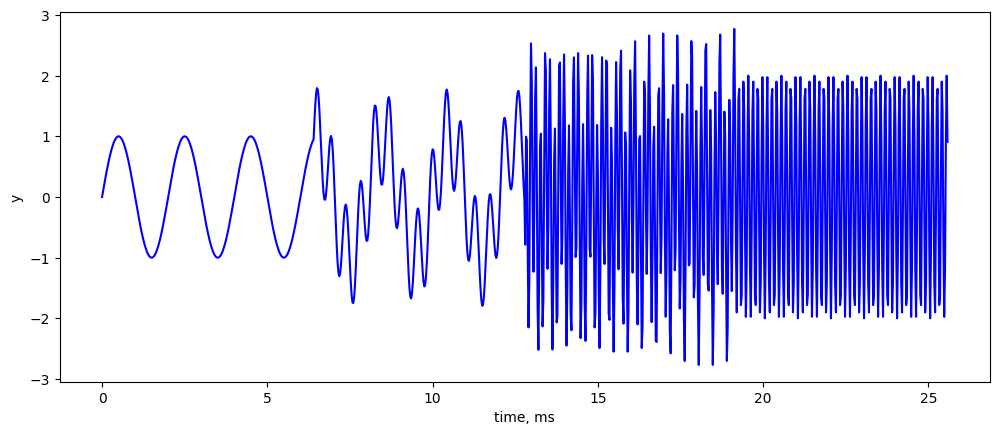

In [46]:
#Don't worry about this cell, just generating a signal
#sequence parameters
N       = 1024   #length of signal
Nseg    = 512    #length of each time block
n_block = 3 #number of time blocks
Noverlap= (n_block*Nseg-N)//(n_block-1) # length of overlap between time blocks
fs      = 40000  #Hz
t_block = np.arange(0, Nseg)/fs # time index of each block
t       = np.arange(0, N)/fs # time index

#amplitudes and frequencies at the first time block
a0_t0 = 1.0
f0_t0 = 500    #Hz
a1_t0 = 0.01
f1_t0 = 15000  #Hz
a2_t0 = 0.2
f2_t0 = 3800   #Hz

#amplitudes and frequencies at the second time block
a0_t1 = 0.8
f0_t1 = 2300   #Hz
a1_t1 = 0.1
f1_t1 = 15800  #Hz
a2_t1 = 0.1
f2_t1 = 10000  #Hz

#amplitudes and frequencies at the third time block
a0_t2 = 2.0
f0_t2 = 7000   #Hz
a1_t2 = 0.3
f1_t2 = 12800  #Hz
a2_t2 = 0.55
f2_t2 = 200    #Hz

y = np.zeros(N, )
for block_index in range(n_block):
    for freq_index in range(1):
        exec("y[block_index*(Nseg-Noverlap):block_index*(Nseg-Noverlap)+Nseg]+=a{:d}_t{:d}*np.sin(2*np.pi*f{:d}_t{:d}*t_block)".format(freq_index, block_index, freq_index, block_index))

w, h = plt.figaspect(0.4)
plt.figure(figsize=(w, h))
plt.plot(1000*t, y, "b")
plt.xlabel("time, ms")
plt.ylabel("y")

interactive(children=(IntSlider(value=1, description='time_seg', max=50, min=1, step=5), IntSlider(value=0, de…

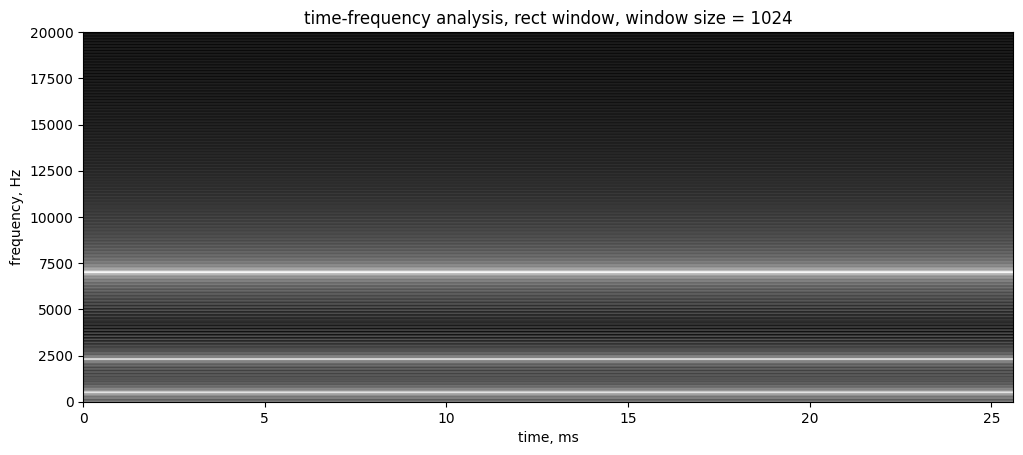

In [47]:
filters = ({"name":"rect", "function":np.ones}, {"name":"hanning", "function":np.hanning}, {"name":"kaiser", "function":np.kaiser})

def sTFT(time_seg, filter_index):
    Nwindow         = N//time_seg
    time_freq_image = np.zeros((N//2, time_seg))
    for time_index in range(time_seg):
        signal_pad      = np.zeros(N, )
        if filter_index<2:
            signal_pad[:Nwindow] = y[time_index*Nwindow:(time_index+1)*Nwindow]*filters[filter_index]["function"](Nwindow)
        else:
            signal_pad[:Nwindow] = y[time_index*Nwindow:(time_index+1)*Nwindow]*filters[filter_index]["function"](Nwindow, 10)

        signal_freq     = np.fft.fft(signal_pad)[:N//2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq     = np.abs(signal_freq)/signal_freq_max
        time_freq_image[:, time_index] = 20*np.log10(signal_freq)

    w, h = plt.figaspect(0.4)
    plt.figure(figsize=(w, h))
    plt.imshow(time_freq_image[::-1, :], cmap="gray", extent=(0, N/fs*1000, 0, fs//2), aspect='auto', clim=(-60, 0))
    plt.title("time-frequency analysis, {:s} window, window size = {:d}".format(filters[filter_index]["name"], Nwindow))
    plt.xlabel("time, ms")
    plt.ylabel("frequency, Hz")

interact(sTFT, time_seg=widgets.IntSlider(min=1, max=50,step=5,value=1), filter_index=widgets.IntSlider(min=0, max=2,step=1,value=0));

##Task 3

1) If we are measuring P300 (hint: what does the 300 stand for?), what is an order-of-magnitude of the time resolution that we want?

2) Optional but recommended: I have a time-domain signal that is the sume of two sinusoids that are very close together. Should I use a rectangular window or a Hanning window before computing the DFT?

In [48]:
#we want 300-400 ms order-of magnitude time resolution.

In [49]:
!pip install mne
%matplotlib inline



# Overview of MEG/EEG analysis with MNE-Python

This tutorial covers the basic EEG/MEG pipeline for event-related analysis:
loading data, epoching, averaging, plotting, and estimating cortical activity
from sensor data. It introduces the core MNE-Python data structures
`~mne.io.Raw`, `~mne.Epochs`, `~mne.Evoked`. Subsequent
tutorials address each of these topics in greater detail.

We begin by importing the necessary Python modules:


In [50]:
import numpy as np
import mne

## Loading data

MNE-Python data structures are based around the FIF file format from
Neuromag, but there are reader functions for `a wide variety of other
data formats <data-formats>`. MNE-Python also has interfaces to a
variety of `publicly available datasets <datasets>`, which MNE-Python
can download and manage for you.

We'll start this tutorial by loading one of the example datasets (called
"`sample-dataset`"), which contains EEG and MEG data from one subject
performing an audiovisual experiment, along with structural MRI scans for
that subject.



In [32]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 183GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 01m48s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [51]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


`~mne.io.Raw` objects also have several built-in plotting methods; here we
show the power spectral density (PSD) for each sensor type with
`~mne.io.Raw.plot_psd`, as well as a plot of the raw sensor traces with
`~mne.io.Raw.plot`. In the PSD plot, we'll only plot frequencies below 50 Hz
(since our data are low-pass filtered at 40 Hz). In interactive Python
sessions, `~mne.io.Raw.plot` is interactive and allows scrolling, scaling,
bad channel marking, annotations, projector toggling, etc.



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


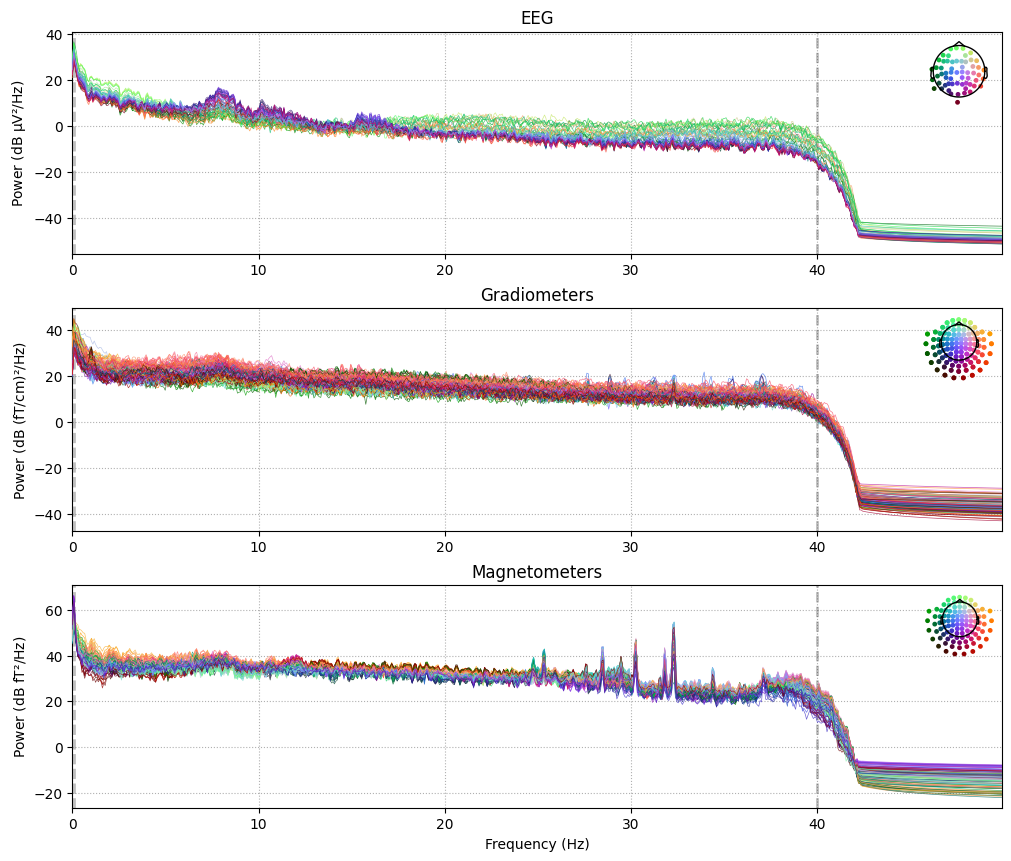

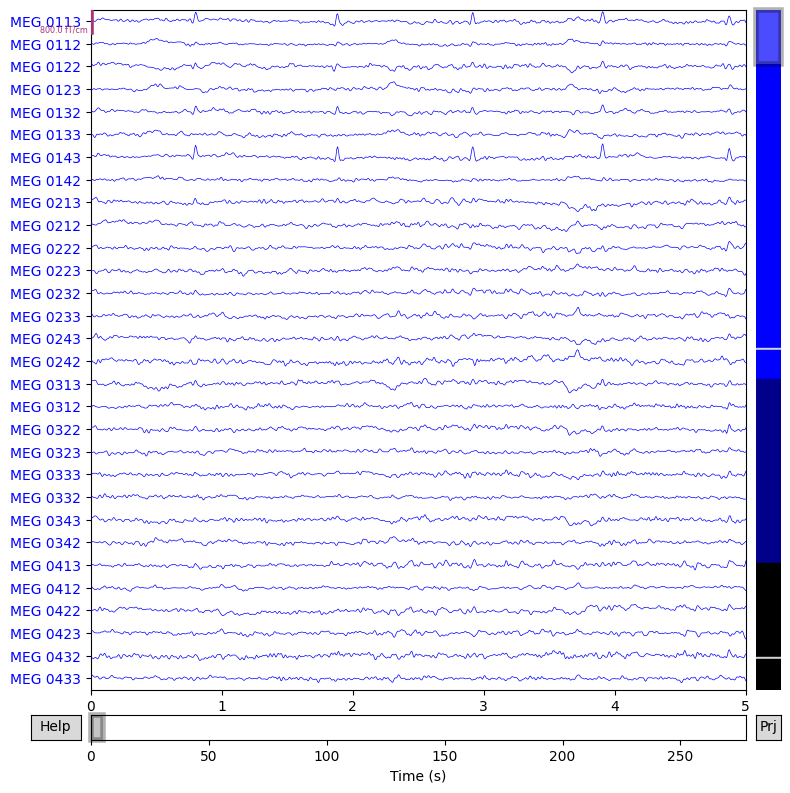

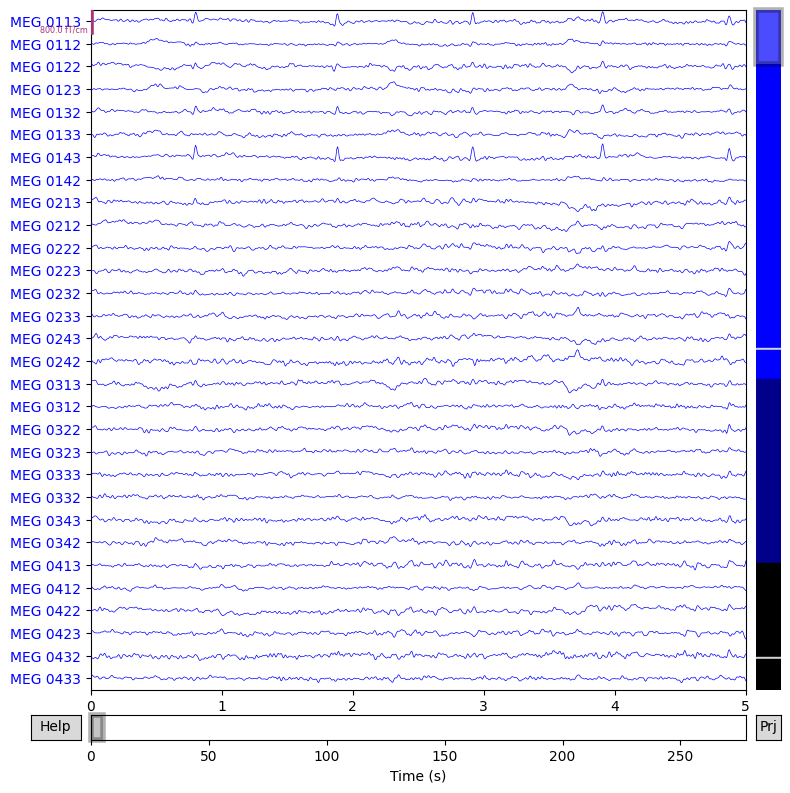

In [52]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

## Preprocessing

MNE-Python supports a variety of preprocessing approaches and techniques
(maxwell filtering, signal-space projection, independent components analysis,
filtering, downsampling, etc); see the full list of capabilities in the
:mod:`mne.preprocessing` and :mod:`mne.filter` submodules. Here we'll clean
up our data by performing independent components analysis
(`~mne.preprocessing.ICA`); for brevity we'll skip the steps that helped us
determined which components best capture the artifacts (see
`tut-artifact-ica` for a detailed walk-through of that process).



Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 21.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


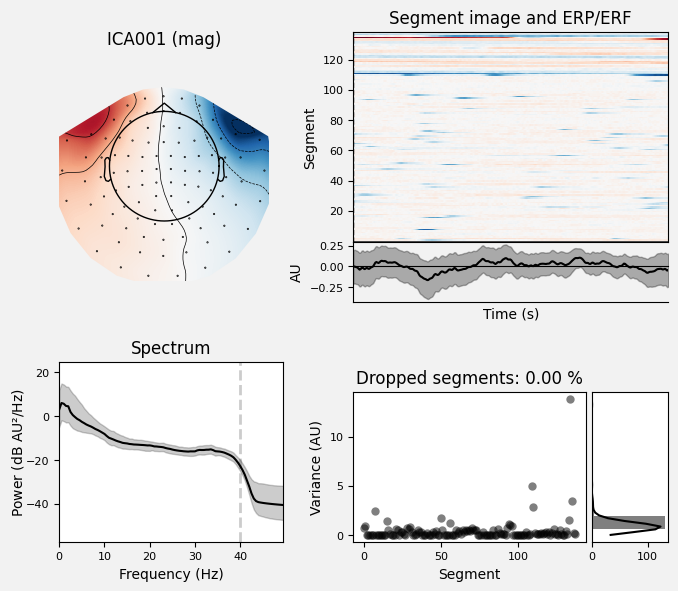

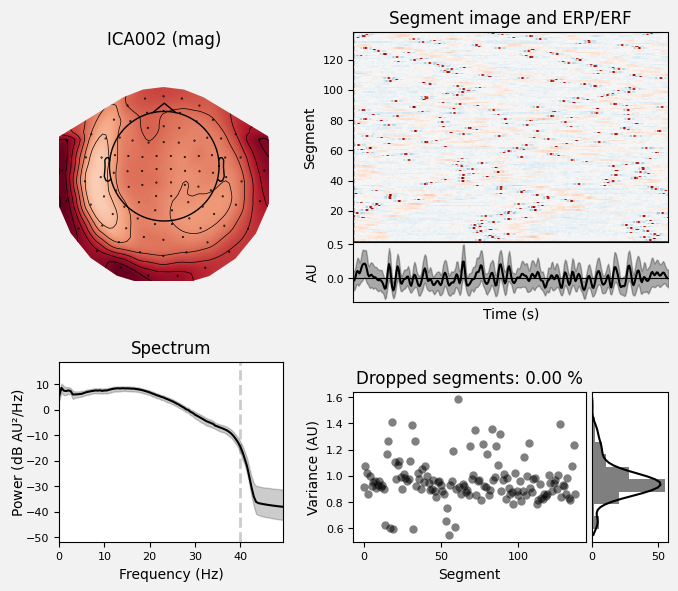

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [53]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Once we're confident about which component(s) we want to remove, we pass them
as the ``exclude`` parameter and then apply the ICA to the raw signal. The
`~mne.preprocessing.ICA.apply` method requires the raw data to be loaded into
memory (by default it's only read from disk as-needed), so we'll use
`~mne.io.Raw.load_data` first. We'll also make a copy of the `~mne.io.Raw`
object so we can compare the signal before and after artifact removal
side-by-side:



Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


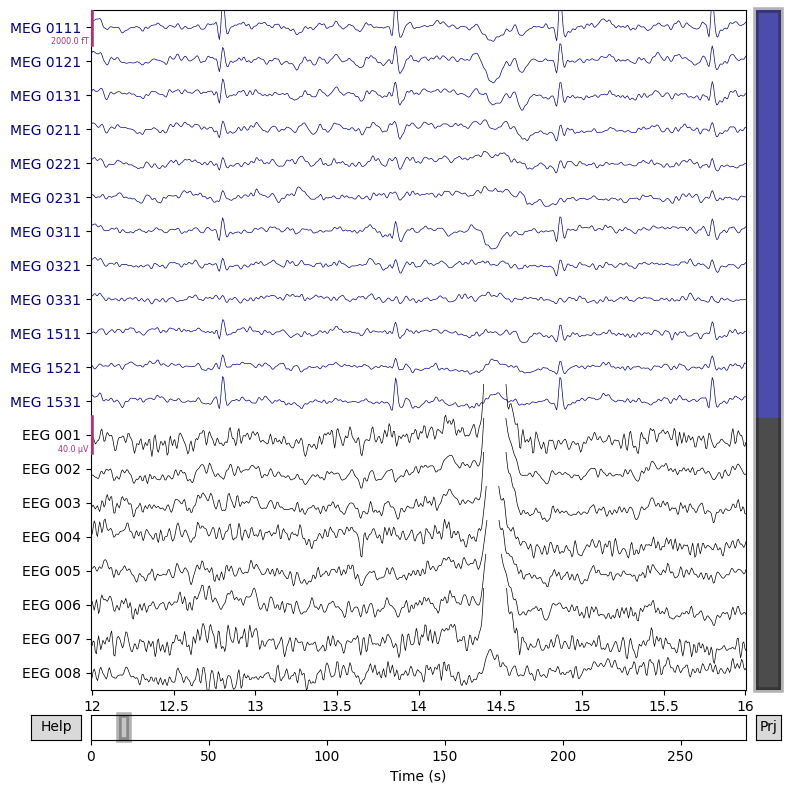

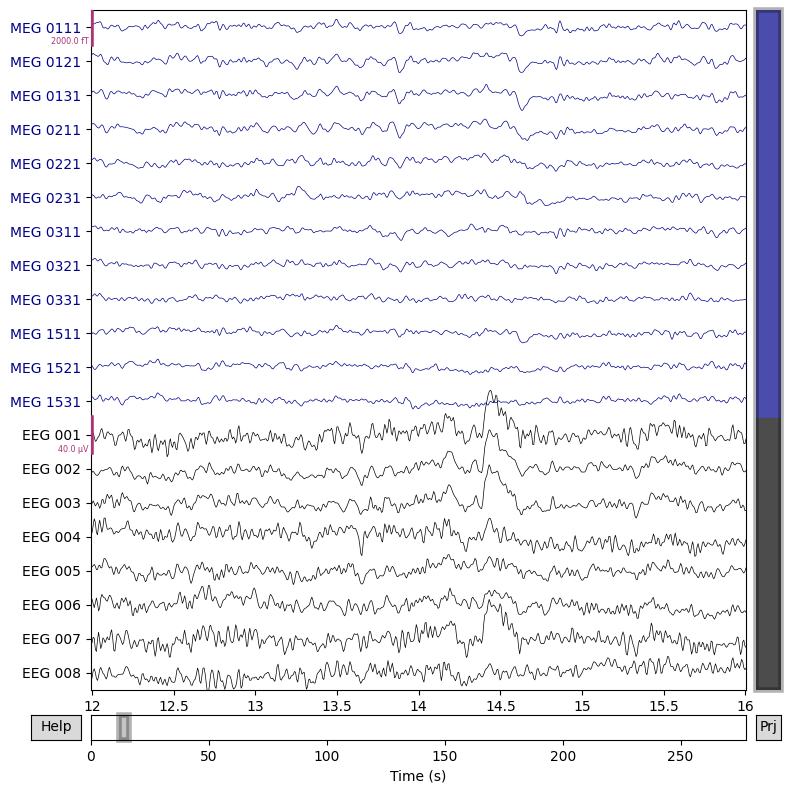

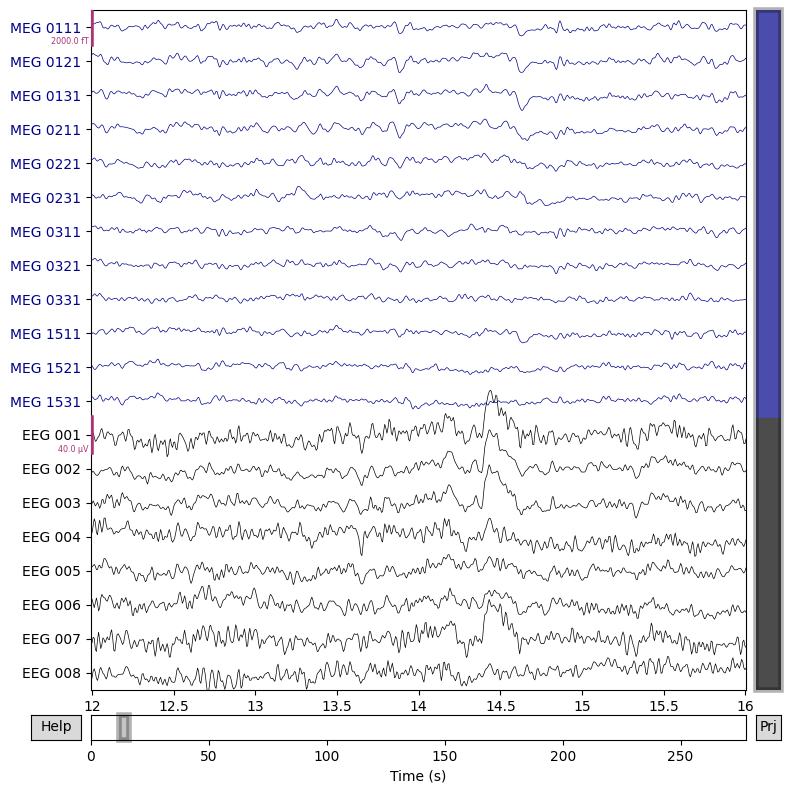

In [54]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)


## Detecting experimental events

The sample dataset includes several :term:`"STIM" channels <stim channel>`
that recorded electrical signals sent from the stimulus delivery computer (as
brief DC shifts / squarewave pulses). These pulses (often called "triggers")
are used in this dataset to mark experimental events: stimulus onset,
stimulus type, and participant response (button press). The individual STIM
channels are combined onto a single channel, in such a way that voltage
levels on that channel can be unambiguously decoded as a particular event
type. On older Neuromag systems (such as that used to record the sample data)
this summation channel was called ``STI 014``, so we can pass that channel
name to the `mne.find_events` function to recover the timing and identity of
the stimulus events.



In [55]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5

319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


The resulting events array is an ordinary 3-column :class:`NumPy array
<numpy.ndarray>`, with sample number in the first column and integer event ID
in the last column; the middle column is usually ignored. Rather than keeping
track of integer event IDs, we can provide an *event dictionary* that maps
the integer IDs to experimental conditions or events. In this dataset, the
mapping looks like this:


+----------+----------------------------------------------------------+
| Event ID | Condition                                                |
+==========+==========================================================+
| 1        | auditory stimulus (tone) to the left ear                 |
+----------+----------------------------------------------------------+
| 2        | auditory stimulus (tone) to the right ear                |
+----------+----------------------------------------------------------+
| 3        | visual stimulus (checkerboard) to the left visual field  |
+----------+----------------------------------------------------------+
| 4        | visual stimulus (checkerboard) to the right visual field |
+----------+----------------------------------------------------------+
| 5        | smiley face (catch trial)                                |
+----------+----------------------------------------------------------+
| 32       | subject button press                                     |
+----------+----------------------------------------------------------+



In [56]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

Event dictionaries like this one are used when extracting epochs from
continuous data; the ``/`` character in the dictionary keys allows pooling
across conditions by requesting partial condition descriptors (i.e.,
requesting ``'auditory'`` will select all epochs with Event IDs 1 and 2;
requesting ``'left'`` will select all epochs with Event IDs 1 and 3). An
example of this is shown in the next section. There is also a convenient
`~mne.viz.plot_events` function for visualizing the distribution of events
across the duration of the recording (to make sure event detection worked as
expected). Here we'll also make use of the `~mne.Info` attribute to get the
sampling frequency of the recording (so our x-axis will be in seconds instead
of in samples).



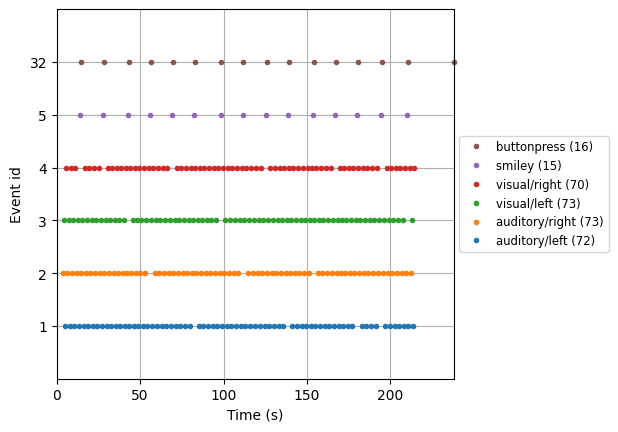

In [57]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

For paradigms that are not event-related (e.g., analysis of resting-state
data), you can extract regularly spaced (possibly overlapping) spans of data
by creating events using `mne.make_fixed_length_events` and then proceeding
with epoching as described in the next section.



## Epoching continuous data

The `~mne.io.Raw` object and the events array are the bare minimum needed to
create an `~mne.Epochs` object, which we create with the `~mne.Epochs` class
constructor. Here we'll also specify some data quality constraints: we'll
reject any epoch where peak-to-peak signal amplitude is beyond reasonable
limits for that channel type. This is done with a *rejection dictionary*; you
may include or omit thresholds for any of the channel types present in your
data. The values given here are reasonable for this particular dataset, but
may need to be adapted for different hardware or recording conditions. For a
more automated approach, consider using the `autoreject package`_.



In [58]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV

We'll also pass the event dictionary as the ``event_id`` parameter (so we can
work with easy-to-pool event labels instead of the integer event IDs), and
specify ``tmin`` and ``tmax`` (the time relative to each event at which to
start and end each epoch). As mentioned above, by default `~mne.io.Raw` and
`~mne.Epochs` data aren't loaded into memory (they're accessed from disk only
when needed), but here we'll force loading into memory using the
``preload=True`` parameter so that we can see the results of the rejection
criteria being applied:



In [59]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


Next we'll pool across left/right stimulus presentations so we can compare
auditory versus visual responses. To avoid biasing our signals to the left or
right, we'll use `~mne.Epochs.equalize_event_counts` first to randomly sample
epochs from each condition to match the number of epochs present in the
condition with the fewest good epochs.



In [60]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs  # free up memory

Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


Like `~mne.io.Raw` objects, `~mne.Epochs` objects also have a number of
built-in plotting methods. One is `~mne.Epochs.plot_image`, which shows each
epoch as one row of an image map, with color representing signal magnitude;
the average evoked response and the sensor location are shown below the
image:



Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


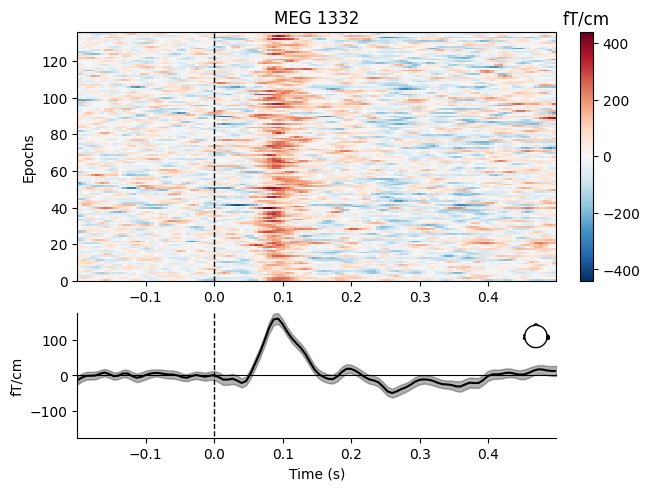

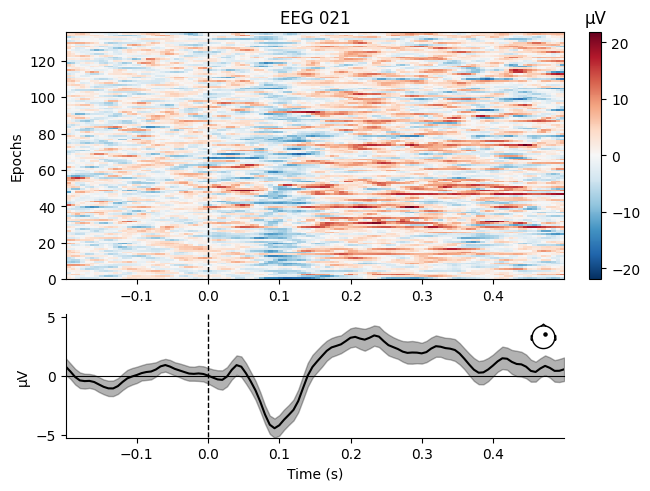

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [61]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

<div class="alert alert-info"><h4>Note</h4><p>Both `~mne.io.Raw` and `~mne.Epochs` objects have `~mne.Epochs.get_data`
    methods that return the underlying data as a
    :class:`NumPy array <numpy.ndarray>`. Both methods have a ``picks``
    parameter for subselecting which channel(s) to return; ``raw.get_data()``
    has additional parameters for restricting the time domain. The resulting
    matrices have dimension ``(n_channels, n_times)`` for `~mne.io.Raw` and
    ``(n_epochs, n_channels, n_times)`` for `~mne.Epochs`.</p></div>

## Time-frequency analysis

The :mod:`mne.time_frequency` submodule provides implementations of several
algorithms to compute time-frequency representations, power spectral density,
and cross-spectral density. Here, for example, we'll compute for the auditory
epochs the induced power at different frequencies and times, using Morlet
wavelets. On this dataset the result is not especially informative (it just
shows the evoked "auditory N100" response); see `here
<inter-trial-coherence>` for a more extended example on a dataset with richer
frequency content.



NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    9.9s


No baseline correction applied


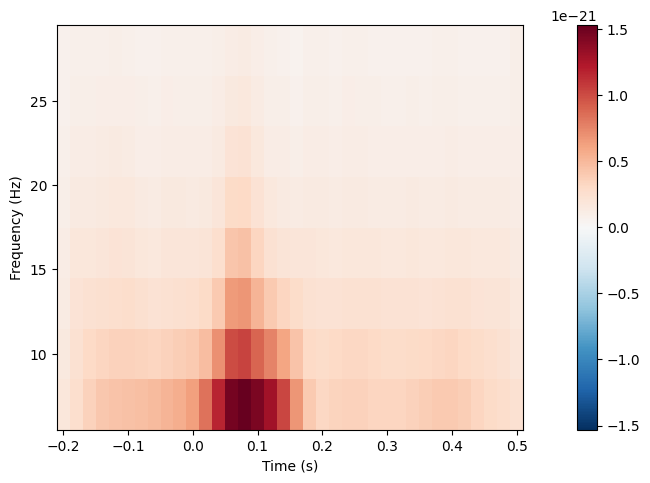

[<Figure size 640x480 with 2 Axes>]

In [62]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1332'])

## Estimating evoked responses

Now that we have our conditions in ``aud_epochs`` and ``vis_epochs``, we can
get an estimate of evoked responses to auditory versus visual stimuli by
averaging together the epochs in each condition. This is as simple as calling
the `~mne.Epochs.average` method on the `~mne.Epochs` object, and then using
a function from the :mod:`mne.viz` module to compare the global field power
for each sensor type of the two `~mne.Evoked` objects:



Multiple channel types selected, returning one figure per type.
combining channels using RMS (grad channels)
combining channels using RMS (grad channels)


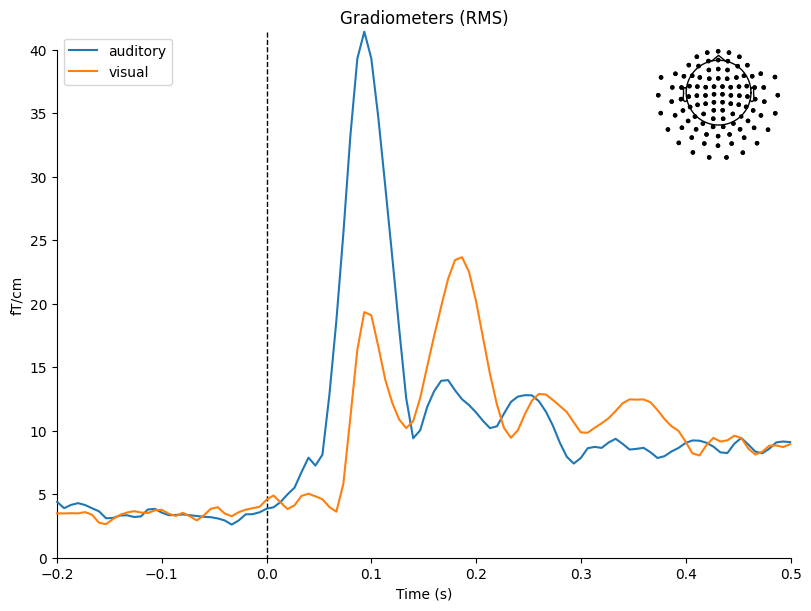

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


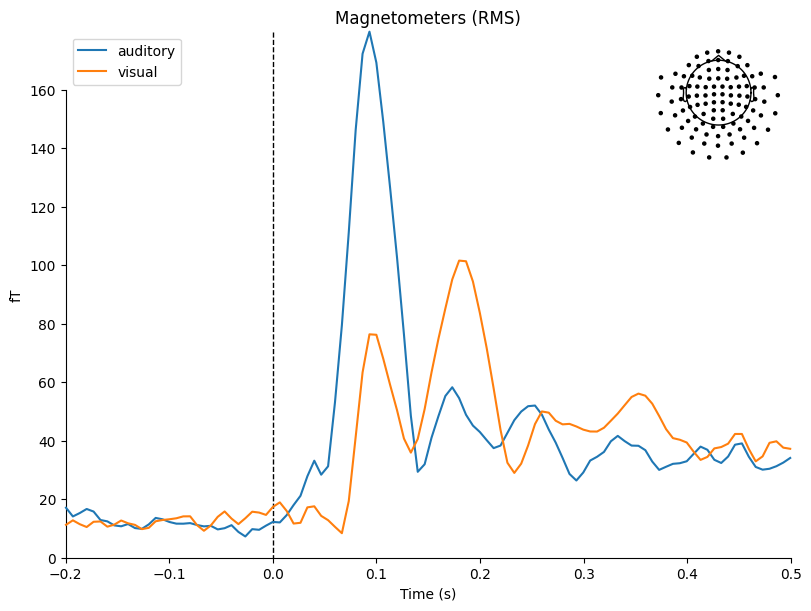

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


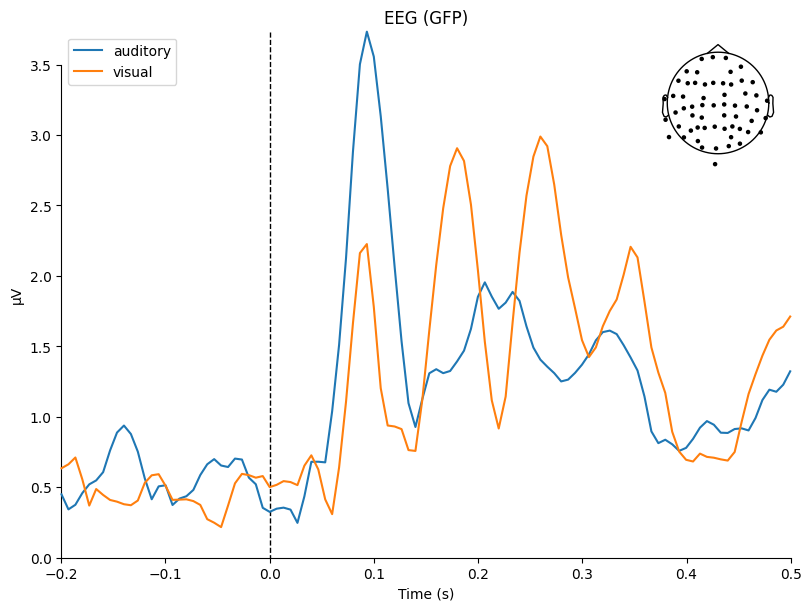

[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]

In [63]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

We can also get a more detailed view of each `~mne.Evoked` object using other
plotting methods such as `~mne.Evoked.plot_joint` or
`~mne.Evoked.plot_topomap`. Here we'll examine just the EEG channels, and see
the classic auditory evoked N100-P200 pattern over dorso-frontal electrodes,
then plot scalp topographies at some additional arbitrary times:



Projections have already been applied. Setting proj attribute to True.


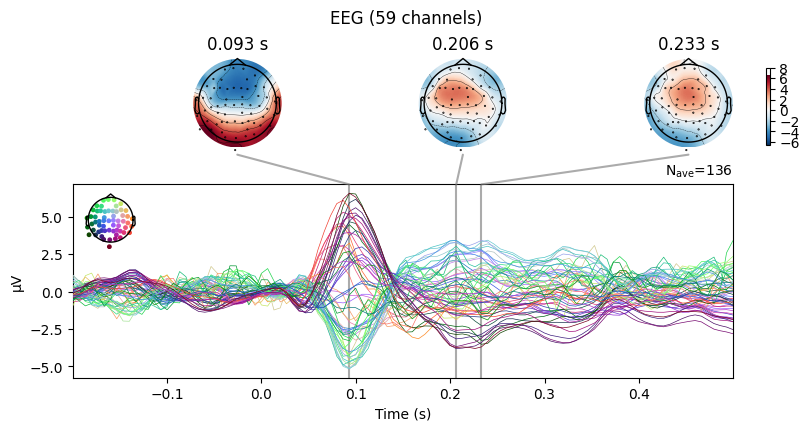

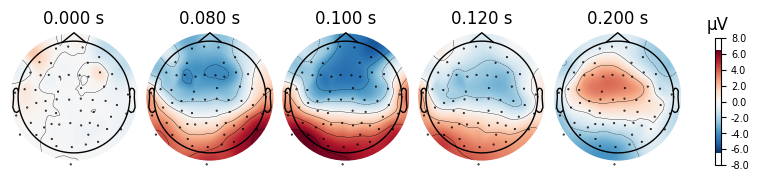

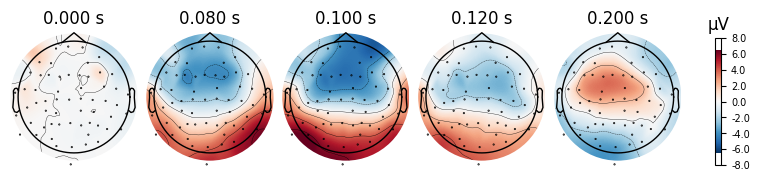

In [64]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Evoked objects can also be combined to show contrasts between conditions,
using the `mne.combine_evoked` function. A simple difference can be
generated by passing ``weights=[1, -1]``. We'll then plot the difference wave
at each sensor using `~mne.Evoked.plot_topo`:



NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


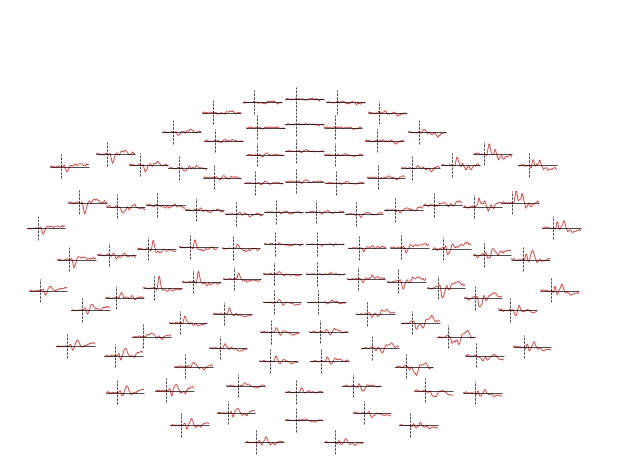

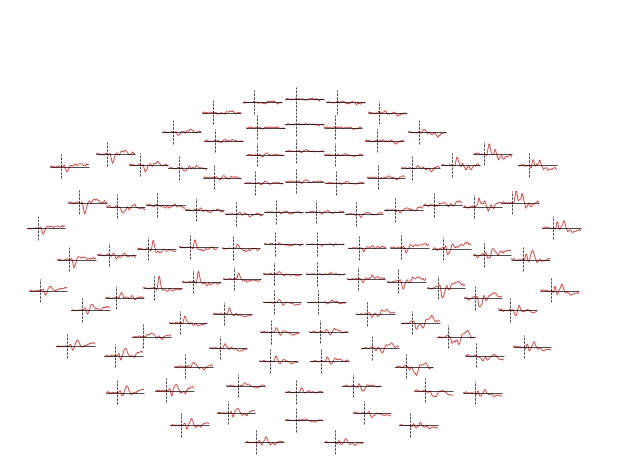

In [65]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

##Task 4

1) What is the sampling rate of our data?

2) Give a reason why we'd want to reject an epoch of our data.

3) How do evoked objects relate to the data in each epoch?

In [66]:
#1) The sampling rate is 40 Hz
#2) We would want to reject an epoch of our data if its an outlier and it will mess up the rest of what we are trying to accomplish.
#3) Evoked objects represent the averaged data across multiple epochs, showing the typical brain response to a specific stimulus or condition